In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
dfencoded = df.copy()

In [7]:
#The fillna() method replaces the NULL values with a specified value. 
dfencoded['Gender'].fillna('Male',inplace=True)
dfencoded['Married'].fillna('Yes',inplace=True)
dfencoded['Dependents'].fillna(0,inplace=True)
dfencoded['Self_Employed'].fillna('No',inplace=True)
dfencoded['LoanAmount'].fillna(dfencoded['LoanAmount'].mean(),inplace=True)
dfencoded['Loan_Amount_Term'].fillna(dfencoded['Loan_Amount_Term'].mean(),inplace=True)
dfencoded['Credit_History'].fillna(1.0,inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [9]:
dfencoded['Loan_ID']=le.fit_transform(dfencoded['Loan_ID'].values)
dfencoded['Gender']=le.fit_transform(dfencoded['Gender'].values)
dfencoded['Married']=le.fit_transform(dfencoded['Married'].values)
dfencoded['Dependents']=le.fit_transform(dfencoded['Dependents'].values)

dfencoded['Education']=le.fit_transform(dfencoded['Education'].values)
dfencoded['Self_Employed']=le.fit_transform(dfencoded['Self_Employed'].values)
dfencoded['Credit_History']=le.fit_transform(dfencoded['Credit_History'].values)
dfencoded['Property_Area']=le.fit_transform(dfencoded['Property_Area'].values)
dfencoded['Loan_Status']=le.fit_transform(dfencoded['Loan_Status'].values)
dfencoded['ApplicantIncome']=le.fit_transform(dfencoded['ApplicantIncome'].values)
dfencoded['CoapplicantIncome']=le.fit_transform(dfencoded['CoapplicantIncome'].values)
dfencoded['LoanAmount']=le.fit_transform(dfencoded['LoanAmount'].values)
dfencoded['Loan_Amount_Term']=le.fit_transform(dfencoded['Loan_Amount_Term'].values)

In [10]:
print(dfencoded.head())

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              376                  0         100                 9   
1              306                 60          81                 9   
2              139                  0          26                 9   
3               90                160          73                 9   
4              381                  0          94                 9   

   Credit_History  Property_Area  Loan_Status  
0               1              2            1  
1               1              0            0  
2             

In [12]:
print(dfencoded.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [14]:
features = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

x=dfencoded[features]
y=dfencoded['Loan_Status']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

treeModel = DecisionTreeClassifier(random_state=0,max_depth=2,criterion='gini').fit(x_train,y_train)
y_pred = treeModel.predict(x_test)

[Text(0.5, 0.8333333333333334, 'x[10] <= 0.5\ngini = 0.424\nsamples = 429\nvalue = [131, 298]'),
 Text(0.25, 0.5, 'x[8] <= 199.0\ngini = 0.146\nsamples = 63\nvalue = [58, 5]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.121\nsamples = 62\nvalue = [58, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[7] <= 282.0\ngini = 0.319\nsamples = 366\nvalue = [73, 293]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.314\nsamples = 364\nvalue = [71, 293]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

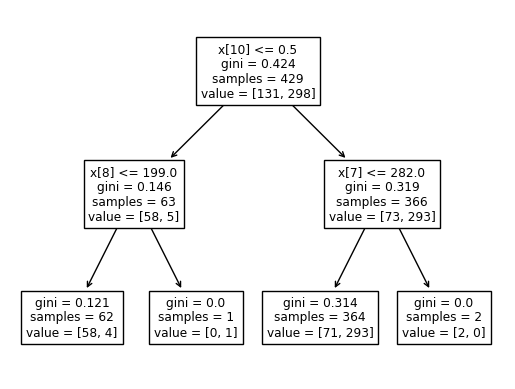

In [17]:
from sklearn import tree
tree.plot_tree(treeModel)

In [18]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[ 25  36]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185

0.7891891891891892
